In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
SFO = pd.read_csv('Salaries.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
SFO.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [13]:
len(SFO)

148648

In [14]:
SFO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,148648.0,74326.110220,42911.633315,1.00,37163.7500,74326.500,111488.2500,148654.00
BasePay,148043.0,66325.398119,42764.898947,-166.01,33587.3500,65007.450,94691.0500,319275.01
OvertimePay,148648.0,5065.821161,11454.266982,-0.01,0.0000,0.000,4657.5975,245131.88
OtherPay,148648.0,3648.761721,8056.655841,-7058.59,0.0000,811.205,4236.0350,400184.25
Benefits,112490.0,25007.777439,15402.235424,-33.89,11535.1925,28628.365,35566.7900,96570.66
TotalPay,148648.0,74770.035453,50516.440633,-618.13,36169.3700,71427.130,105840.9200,567595.43
TotalPayBenefits,148648.0,93694.776345,62792.743250,-618.13,44072.0625,92406.020,132876.9975,567595.43
Year,148648.0,2012.522617,1.117526,2011.00,2012.0000,2013.000,2014.0000,2014.00
Notes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
SFO.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [16]:
print("Base Pay - ",SFO['BasePay'].max())
print("Over time Pay - ",SFO['OvertimePay'].max())
print("Other Pay - ",SFO['OtherPay'].max())
print("Benefits - ",SFO['Benefits'].max())
print("Total Pay - ",SFO['TotalPay'].max())
print("Total Pay Benefits - ",SFO['TotalPayBenefits'].max())

Base Pay -  319275.01
Over time Pay -  245131.88
Other Pay -  400184.25
Benefits -  96570.66
Total Pay -  567595.43
Total Pay Benefits -  567595.43


In [17]:
print("Base Pay - ",SFO['BasePay'].mean())
print("Over time Pay - ",SFO['OvertimePay'].mean())
print("Other Pay - ",SFO['OtherPay'].mean())
print("Benefits - ",SFO['Benefits'].mean())
print("Total Pay - ",SFO['TotalPay'].mean())
print("Total Pay Benefits - ",SFO['TotalPayBenefits'].mean())

Base Pay -  66325.39811867346
Over time Pay -  5065.821161468659
Other Pay -  3648.761721112999
Benefits -  25007.777439150406
Total Pay -  74770.03545295961
Total Pay Benefits -  93694.77634505832


# 1. Compute how much total salary cost has increased from year 2011 to 2014

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


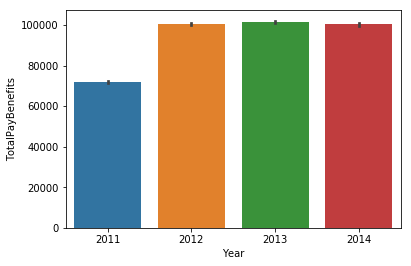

In [18]:
sns.barplot(x="Year", y="TotalPayBenefits", data=SFO)

In [19]:
SFO2011=SFO[SFO['Year']==2011]

In [20]:
SFO2014=SFO[SFO['Year']==2014]

In [21]:
print("Salary cost increased from 2011 to 2014 is ",format(int(SFO2014['TotalPayBenefits'].sum()-SFO2011['TotalPayBenefits'].sum()),',d'))

Salary cost increased from 2011 to 2014 is  1,227,752,749


In [22]:
print("Salary cost increased from 2011 to 2014 is ",format(int(SFO[SFO['Year']==2014]['TotalPayBenefits'].sum()-SFO[SFO['Year']==2011]['TotalPayBenefits'].sum()),',d'))

Salary cost increased from 2011 to 2014 is  1,227,752,749


# 2. Which Job Title in Year 2014 has highest mean salary?

In [23]:
HMS = SFO[SFO['Year']==2014][['JobTitle','TotalPayBenefits']].mean()

In [24]:
s= pd.DataFrame(SFO[SFO['Year']==2014].groupby('JobTitle').TotalPayBenefits.mean())

In [25]:
s = s.sort_values(by='TotalPayBenefits', ascending=False)

In [26]:
s.head(1)

,TotalPayBenefits
JobTitle,
Chief Investment Officer,436224.36


# 3. How much money could have been saved in Year 2014 by stopping OverTimePay?

In [43]:
print("If we cut down overtime pay from Total Pay Benefits,we will be doing profit of : ",format(int(SFO[SFO['Year']==2014]['TotalPayBenefits'].sum()-SFO[SFO['Year']==2014]['OvertimePay'].sum()),',d'))

If we cut down overtime pay from Total Pay Benefits,we will be doing profit of :  3,615,947,181


In [44]:
a = round(SFO[SFO['Year']==2014]['TotalPayBenefits'].sum()-SFO[SFO['Year']==2014]['OvertimePay'].sum(),2)

In [45]:
format(int((a)), ',d')

'3,615,947,181'

# 4. Which are the top 5 common job in Year 2014 and how much do they cost SFO ?

In [46]:
SFO[SFO['Year']==2014][['JobTitle','EmployeeName']].count()
c= pd.DataFrame(SFO[SFO['Year']==2014].groupby(['JobTitle']).EmployeeName.count())
c = c.sort_values(by='EmployeeName', ascending=False)

In [47]:
SFO[SFO['Year']==2014][['JobTitle','TotalPayBenefits']].sum()
d= pd.DataFrame(SFO[SFO['Year']==2014].groupby(['JobTitle']).TotalPayBenefits.sum())
d = d.sort_values(by='TotalPayBenefits', ascending=False)

In [48]:
merger = pd.merge(c, d, on='JobTitle')

In [49]:
pd.options.display.float_format = '{:,.2f}'.format
merger.head(5)

,EmployeeName,TotalPayBenefits
JobTitle,,
Transit Operator,2479,"214,976,389.79"
Special Nurse,1478,"53,443,054.51"
Registered Nurse,1234,"187,216,454.08"
Public Svc Aide-Public Works,916,"9,806,317.44"
Firefighter,815,"144,827,011.84"


# 5. Who was the top earning employee across all the years?

In [50]:
SFO1 = pd.read_csv('Salaries.csv')
SFO1[['TotalPayBenefits']].sum()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TotalPayBenefits   13,927,541,114.14
dtype: float64

In [51]:
E= pd.DataFrame(SFO1.groupby('EmployeeName').TotalPayBenefits.sum())

In [52]:
E = E.sort_values(by='TotalPayBenefits', ascending=False)
E.head()

,TotalPayBenefits
EmployeeName,
Kevin Lee,"1,778,487.17"
Steven Lee,"1,706,550.76"
William Wong,"1,459,954.17"
Stanley Lee,"1,457,279.68"
Richard Lee,"1,268,668.84"


# Enhancements for code

# You can try these enhancements in code

# 1. Which are the last 5 common job in Year 2014 and how much do they cost SFO?

In [53]:
E.head()

,TotalPayBenefits
EmployeeName,
Kevin Lee,"1,778,487.17"
Steven Lee,"1,706,550.76"
William Wong,"1,459,954.17"
Stanley Lee,"1,457,279.68"
Richard Lee,"1,268,668.84"


# 2. In year 201 OverTimePay was what percentage of TotalPayBenefits

In [54]:
print("Over time pay % for 2011 is ","{0:.0f}%".format((SFO[SFO['Year']==2011]['OvertimePay'].sum()/SFO[SFO['Year']==2011]['TotalPayBenefits'].sum())*100))

Over time pay % for 2011 is  6%


In [55]:
print("Over time pay % for 2012 is ","{0:.0f}%".format((SFO[SFO['Year']==2012]['OvertimePay'].sum()/SFO[SFO['Year']==2012]['TotalPayBenefits'].sum())*100))

Over time pay % for 2012 is  5%


In [56]:
print("Over time pay % for 2013 is ","{0:.0f}%".format((SFO[SFO['Year']==2013]['OvertimePay'].sum()/SFO[SFO['Year']==2013]['TotalPayBenefits'].sum())*100))

Over time pay % for 2013 is  5%


In [57]:
print("Over time pay % for 2014 is ","{0:.0f}%".format((SFO[SFO['Year']==2014]['OvertimePay'].sum()/SFO[SFO['Year']==2014]['TotalPayBenefits'].sum())*100))

Over time pay % for 2014 is  5%


# 3. Which Job Title in Year 2014 has lowest mean salary?

In [58]:
s.tail(1)

,TotalPayBenefits
JobTitle,
"BdComm Mbr, Grp2,M=$25/Mtg",345.42
